### Powerlifiting Dataset Analysis

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the CSV file
data = pd.read_csv("C:/Users/Varty/Downloads/powerlifting.csv")
print(data)

In [ ]:
data.head()

In [8]:
data.tail()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333
2999,Daniel Lee,22,83 kg,Deadlift,280


In [10]:
data.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [20]:
print(data.shape)
print(data.shape[0])
print(data.shape[1])

(3000, 5)
3000
5


In [22]:
list(data.columns)

['Lifter Name', 'Age', 'Weight Class', 'Lift Type', 'Amount Lifted (kg)']

In [24]:
data.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

In [26]:
# checking the null values exits or not
data.isnull()
data.isna()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2995,False,False,False,False,False
2996,False,False,False,False,False
2997,False,False,False,False,False
2998,False,False,False,False,False


In [28]:
data.isnull().sum()

Lifter Name           0
Age                   0
Weight Class          0
Lift Type             0
Amount Lifted (kg)    0
dtype: int64

In [48]:
# top 5 names of weight lifted
top_lifters = data.sort_values(by='Amount Lifted (kg)', ascending=False)

top_5 = top_lifters.head()

print(top_5[['Lifter Name', 'Amount Lifted (kg)', 'Lift Type']])

           Lifter Name  Amount Lifted (kg)    Lift Type
2778  Matthew Anderson                 399  Bench Press
2758       Emily Davis                 399        Squat
2795        Jane Smith                 399     Deadlift
1207   Michael Johnson                 399  Bench Press
2105   Michael Johnson                 399        Squat


In [58]:
# count of lift type with names
lift_type_counts = data.groupby('Lift Type').agg(Lifter_Name=('Lifter Name', ', '.join),Count=('Lifter Name', 'count')).reset_index()
print(lift_type_counts)

     Lift Type                                        Lifter_Name  Count
0  Bench Press  Jessica Wilson, John Doe, Emily Davis, Jessica...   1011
1     Deadlift  Laura Taylor, Emily Davis, Laura Taylor, Danie...   1025
2        Squat  Emily Davis, Sarah Thomas, Michael Johnson, Je...    964


In [124]:
#age above 50
data[data['Age'] > 50]

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg),Age Group
1,John Doe,60,83 kg,Bench Press,179,61-69
4,Laura Taylor,56,74 kg,Deadlift,221,50-60
5,Sarah Thomas,56,74 kg,Squat,264,50-60
8,Michael Johnson,55,93 kg,Squat,265,50-60
12,Matthew Anderson,64,74 kg,Bench Press,398,61-69
...,...,...,...,...,...,...
2989,Chris Brown,56,52 kg,Deadlift,182,50-60
2991,John Doe,64,93 kg,Deadlift,263,61-69
2992,John Doe,51,52 kg,Bench Press,170,50-60
2994,Sarah Thomas,62,105 kg,Bench Press,191,61-69


In [94]:
# top 50 age groups
bins = [50, 60, 70, 80]
labels = ['50-60', '61-69', '70+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_group_counts = data['Age Group'].value_counts().sort_index()
print(age_group_counts)

Age Group
50-60    672
61-69    313
70+        0
Name: count, dtype: int64


In [132]:
#above 100 kg weight class
data[data['Weight Class']==('105 kg|120 kg|Open')]

print(above_100_kg[['Lifter Name', 'Weight Class', 'Lift Type', 'Amount Lifted (kg)']])

           Lifter Name Weight Class    Lift Type  Amount Lifted (kg)
2          Emily Davis       105 kg  Bench Press                 235
7       Jessica Wilson       120 kg  Bench Press                 178
13    Matthew Anderson       120 kg  Bench Press                 396
17        Laura Taylor       105 kg     Deadlift                 273
18    Matthew Anderson       120 kg  Bench Press                 120
...                ...          ...          ...                 ...
2987          John Doe       105 kg  Bench Press                 287
2990      Laura Taylor         Open     Deadlift                 287
2994      Sarah Thomas       105 kg  Bench Press                 191
2996        Daniel Lee         Open     Deadlift                 244
2997      Sarah Thomas         Open        Squat                 148

[993 rows x 4 columns]


In [128]:
#only deadlift candidates
data[data['Lift Type'] == 'Deadlift']


,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg),Age Group
4,Laura Taylor,56,74 kg,Deadlift,221,50-60
6,Emily Davis,40,83 kg,Deadlift,132,NaN
10,Laura Taylor,31,52 kg,Deadlift,328,NaN
11,Daniel Lee,38,52 kg,Deadlift,347,NaN
15,Daniel Lee,37,59 kg,Deadlift,133,NaN
...,...,...,...,...,...,...
2989,Chris Brown,56,52 kg,Deadlift,182,50-60
2990,Laura Taylor,23,Open,Deadlift,287,NaN
2991,John Doe,64,93 kg,Deadlift,263,61-69
2996,Daniel Lee,39,Open,Deadlift,244,NaN


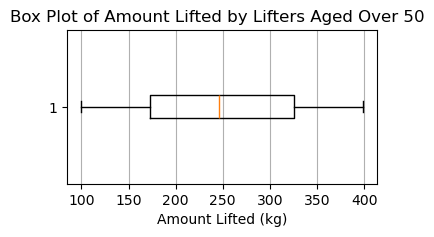

In [185]:
# age greater than 50 in boxplot
age_above_50 = data[data['Age'] > 50]
plt.figure(figsize=(4, 2))
plt.boxplot(age_above_50['Amount Lifted (kg)'], vert=False)
plt.suptitle('Box Plot of Amount Lifted by Lifters Aged Over 50')
plt.xlabel('Amount Lifted (kg)')
plt.grid(axis='x')
plt.show()

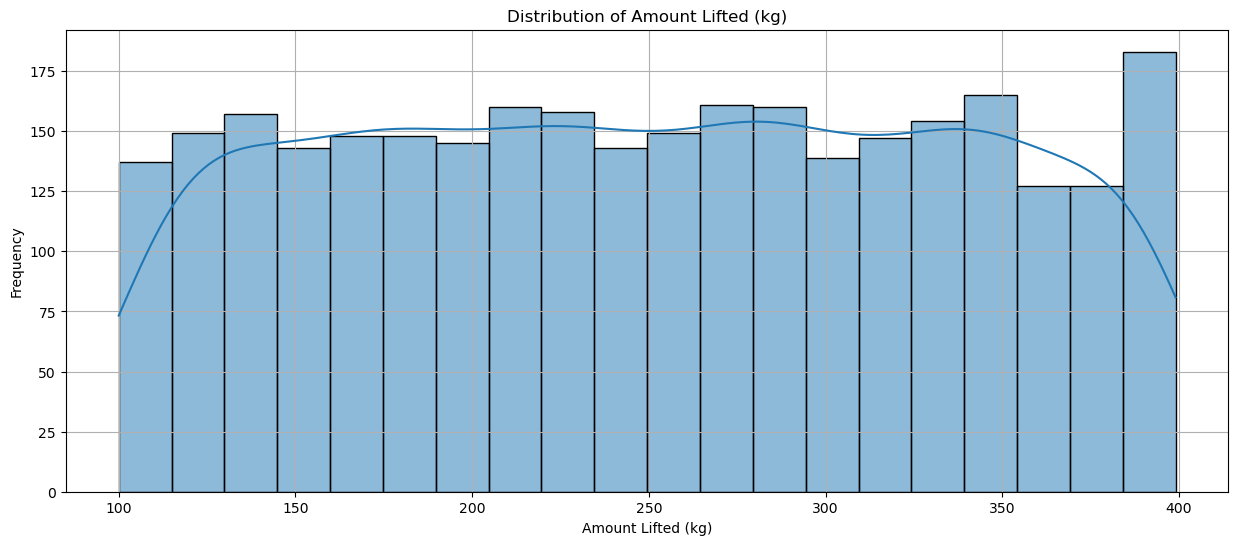

In [183]:
# Histplot of Amount Lifted
plt.figure(figsize=(15, 6))
sns.histplot(data['Amount Lifted (kg)'], bins=20, kde=True)
plt.title('Distribution of Amount Lifted (kg)')
plt.xlabel('Amount Lifted (kg)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

C:\Users\varty\AppData\Local\Temp\ipykernel_20320\2698875751.py:3: UserWarning: 
The markers list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Age', y='Amount Lifted (kg)', data=data, hue='Lift Type', style='Weight Class', palette='deep', markers=['o', 's', 'D', 'X', '^'])


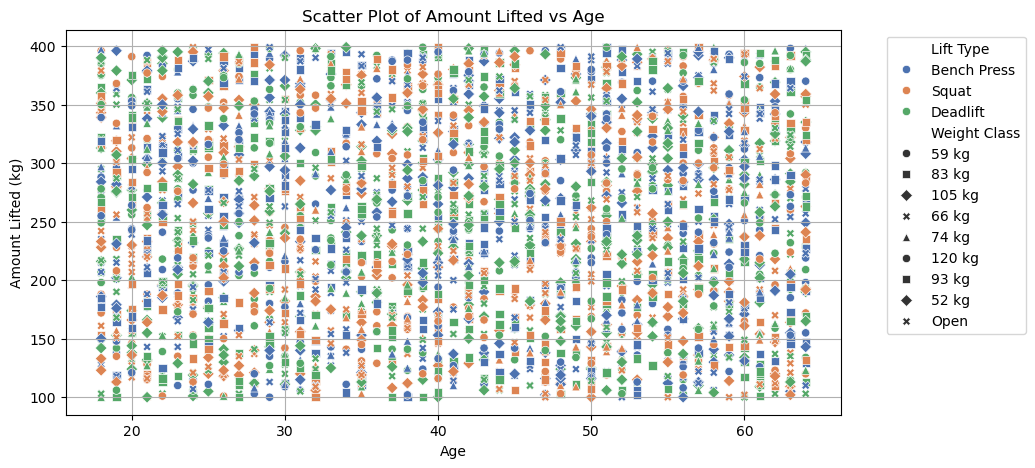

In [196]:
# Create a scatter plot for Amount Lifted vs Age
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Amount Lifted (kg)', data=data, hue='Lift Type', style='Weight Class', palette='deep', markers=['o', 's', 'D', 'X', '^'])
plt.title('Scatter Plot of Amount Lifted vs Age')
plt.xlabel('Age')
plt.ylabel('Amount Lifted (kg)')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [ ]:
# Create a cat plot for Lift Type by Lifter Name
sns.catplot(x='Lifter Name', hue='Lift Type', data=data, kind='count', height=6, aspect=2)
plt.title('Distribution of Lift Types by Lifter Name')
plt.xlabel('Lifter Name')
plt.ylabel('Count of Lifts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()